In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
#load or create dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Annual_Income_(USD$)': [15, 16, 17, 18, 19, 80, 85, 86, 87, 88],
    'Spending_Score_(1_100)': [38, 81, 6, 77, 40, 76, 94, 3, 72, 14]
}
df = pd.DataFrame(data)
print(df)

   CustomerID  Annual_Income_(USD$)  Spending_Score_(1_100)
0           1                    15                      38
1           2                    16                      81
2           3                    17                       6
3           4                    18                      77
4           5                    19                      40
5           6                    80                      76
6           7                    85                      94
7           8                    86                       3
8           9                    87                      72
9          10                    88                      14


In [6]:
#select features for clustering
x = df[['Annual_Income_(USD$)', 'Spending_Score_(1_100)']]

In [8]:
kMeans = KMeans(n_clusters=2, random_state=0)
kMeans.fit(x)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [9]:
#add cluster labels to the original dataframe
df['Cluster'] = kMeans.labels_
print(df)

   CustomerID  Annual_Income_(USD$)  Spending_Score_(1_100)  Cluster
0           1                    15                      38        1
1           2                    16                      81        1
2           3                    17                       6        1
3           4                    18                      77        1
4           5                    19                      40        1
5           6                    80                      76        0
6           7                    85                      94        0
7           8                    86                       3        0
8           9                    87                      72        0
9          10                    88                      14        0


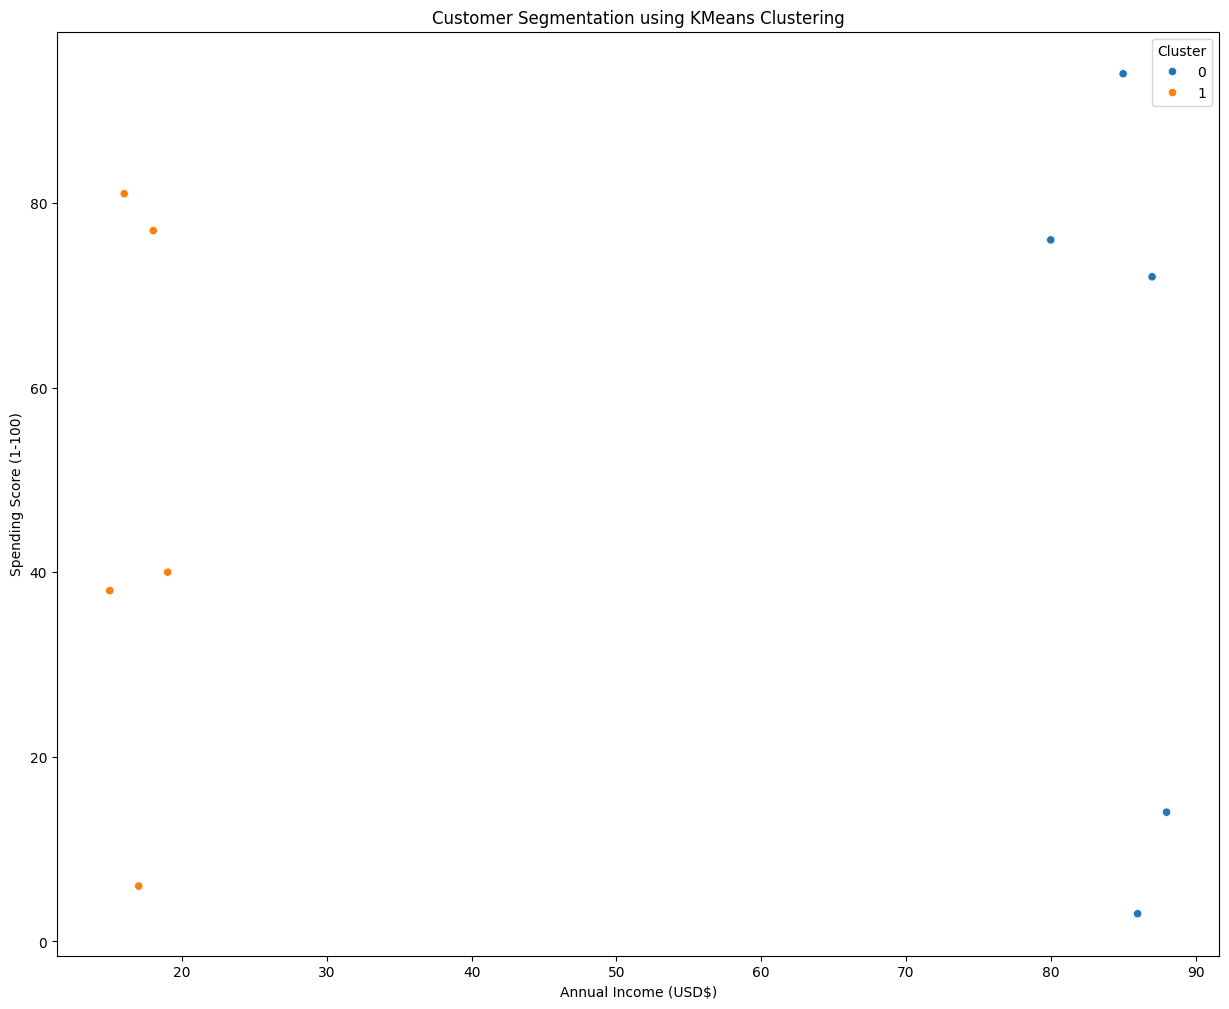

In [10]:
plt.figure(figsize=(15, 12))
sns.scatterplot(data=df, x='Annual_Income_(USD$)', y='Spending_Score_(1_100)', hue='Cluster')
plt.title('Customer Segmentation using KMeans Clustering')
plt.xlabel('Annual Income (USD$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, [1, 2]].values


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

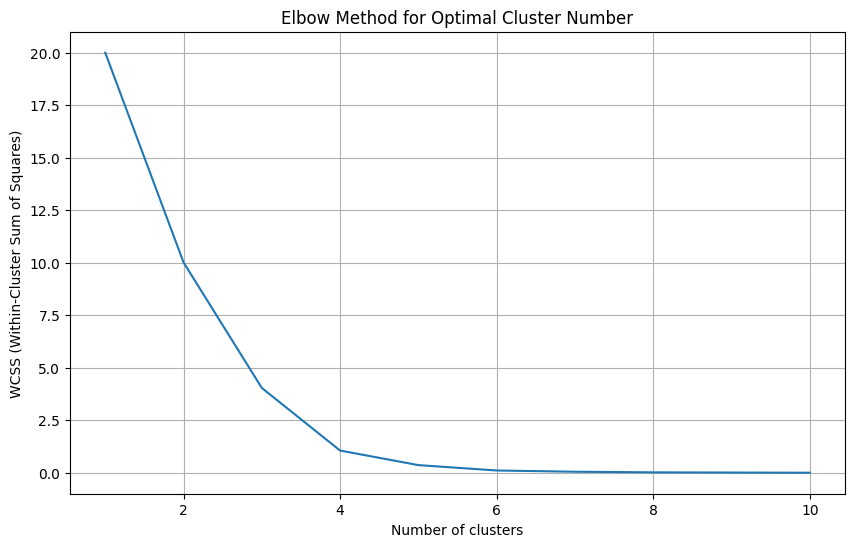

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Cluster Number')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xlabel('Number of clusters')
plt.grid(True)
plt.show()